# Data Analytics Project

In [108]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split

In [109]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [110]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

### Dataset is based on the follwoing 

https://archive.ics.uci.edu/ml/datasets/statlog+(german+credit+data)

Attribute Information:

Attribute 1: (qualitative)
Status of existing checking account
A11 : ... < 0 DM
A12 : 0 <= ... < 200 DM
A13 : ... >= 200 DM / salary assignments for at least 1 year
A14 : no checking account

Attribute 2: (numerical)
Duration in month

Attribute 3: (qualitative)
Credit history
A30 : no credits taken/ all credits paid back duly
A31 : all credits at this bank paid back duly
A32 : existing credits paid back duly till now
A33 : delay in paying off in the past
A34 : critical account/ other credits existing (not at this bank)

Attribute 4: (qualitative)
Purpose
A40 : car (new)
A41 : car (used)
A42 : furniture/equipment
A43 : radio/television
A44 : domestic appliances
A45 : repairs
A46 : education
A47 : (vacation - does not exist?)
A48 : retraining
A49 : business
A410 : others

Attribute 5: (numerical)
Credit amount

Attibute 6: (qualitative)
Savings account/bonds
A61 : ... < 100 DM
A62 : 100 <= ... < 500 DM
A63 : 500 <= ... < 1000 DM
A64 : .. >= 1000 DM
A65 : unknown/ no savings account

Attribute 7: (qualitative)
Present employment since
A71 : unemployed
A72 : ... < 1 year
A73 : 1 <= ... < 4 years
A74 : 4 <= ... < 7 years
A75 : .. >= 7 years

Attribute 8: (numerical)
Installment rate in percentage of disposable income

Attribute 9: (qualitative)
Personal status and sex
A91 : male : divorced/separated
A92 : female : divorced/separated/married
A93 : male : single
A94 : male : married/widowed
A95 : female : single

Attribute 10: (qualitative)
Other debtors / guarantors
A101 : none
A102 : co-applicant
A103 : guarantor

Attribute 11: (numerical)
Present residence since

Attribute 12: (qualitative)
Property
A121 : real estate
A122 : if not A121 : building society savings agreement/ life insurance
A123 : if not A121/A122 : car or other, not in attribute 6
A124 : unknown / no property

Attribute 13: (numerical)
Age in years

Attribute 14: (qualitative)
Other installment plans
A141 : bank
A142 : stores
A143 : none

Attribute 15: (qualitative)
Housing
A151 : rent
A152 : own
A153 : for free

Attribute 16: (numerical)
Number of existing credits at this bank

Attribute 17: (qualitative)
Job
A171 : unemployed/ unskilled - non-resident
A172 : unskilled - resident
A173 : skilled employee / official
A174 : management/ self-employed/
highly qualified employee/ officer

Attribute 18: (numerical)
Number of people being liable to provide maintenance for

Attribute 19: (qualitative)
Telephone
A191 : none
A192 : yes, registered under the customers name

Attribute 20: (qualitative)
foreign worker
A201 : yes
A202 : no

In [111]:
df = pd.read_csv("german_credit_modified.csv")
df.head()

,Checking Account,Duration,Credit History,Purpose,Credit Amount,Saving Account,Employment Status,Installment Rate,Personal Status,Guarantors,Years in current address,Property,Age,Installment plans,Housing,Existing Credits,Job,Liable,Risk
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,4,A121,67,A143,A152,2,A173,1,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,2,A121,22,A143,A152,1,A173,1,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,3,A121,49,A143,A152,1,A172,2,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,4,A122,45,A143,A153,1,A173,2,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,4,A124,53,A143,A153,2,A173,2,2


In [112]:
#df['Risk'] = df['Risk'].apply(lambda x: 'good' if x == 1 else 'bad')

In [113]:
#df.head()

<AxesSubplot:xlabel='Risk', ylabel='count'>

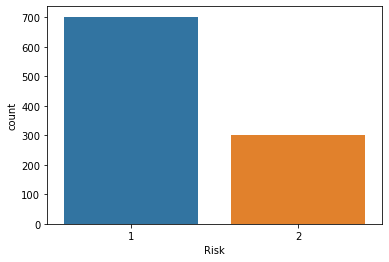

In [114]:
sns.countplot(df['Risk'])

***The original dataset is hard to understand. So we are going to decode the fields to an easier to understand format***

In [115]:
decode_map = {'A11': 'little', 'A12': 'moderate', 'A13': 'rich', 'A14': 'No Account',
              'A30': 'paid back', 'A31': 'paid back', 'A32': 'paid back', 
              'A33': 'delay', 'A34': 'default',
              'A40' : 'car',
              'A41' : 'car',
              'A42' : 'furniture/equipment',
              'A43' : 'radio/television',
              'A44' : 'domestic appliances',
              'A45' : 'repairs',
              'A46' : 'education',
              'A47' : 'vacation',
              'A48' : 'retraining',
              'A49' : 'business',
              'A410' : 'others',
              'A61' :  'little',
              'A62' :  'moderate',
              'A63' :  'quite rich',
              'A64' :  'rich',
              'A65' :  'unknown',
              
              'A71' : 'unemployed',
              'A72' : '< 1 year',
              'A73' : '1 to <4 years',
              'A74': '4 to <7 years',
              'A75' : '>= 7 years',

              'A91' : 'male   : divorced/separated',
              'A92' : 'female : divorced/separated/married',
              'A93' : 'male   : single',
              'A94' : 'male   : married/widowed',
              'A95' : 'female : single',
              
              'A101' : 'none',
              'A102' : 'co-applicant',
              'A103' : 'guarantor',

              'A121' : 'real estate',
              'A122' : 'life insurance',
              'A123' : 'car',
              'A124' : 'no property',
              
              'A141' : 'bank',
              'A142' : 'stores',
              'A143' : 'none',
              'A151' : 'rent',
              'A152' : 'own',
              'A153' : 'for free',


              'A171' : 'unemployed/non-resident',
              'A172' : 'unskilled/resident',
              'A173' : 'skilled employee',
              'A174' : 'management/highly qualified employee',
            
             }

In [116]:
for col in df.columns:
    df[col] = df[col].apply(lambda x: decode_map[x] if x in decode_map.keys() else x)

In [117]:
df.head()

,Checking Account,Duration,Credit History,Purpose,Credit Amount,Saving Account,Employment Status,Installment Rate,Personal Status,Guarantors,Years in current address,Property,Age,Installment plans,Housing,Existing Credits,Job,Liable,Risk
0,little,6,default,radio/television,1169,unknown,>= 7 years,4,male : single,none,4,real estate,67,none,own,2,skilled employee,1,1
1,moderate,48,paid back,radio/television,5951,little,1 to <4 years,2,female : divorced/separated/married,none,2,real estate,22,none,own,1,skilled employee,1,2
2,No Account,12,default,education,2096,little,4 to <7 years,2,male : single,none,3,real estate,49,none,own,1,unskilled/resident,2,1
3,little,42,paid back,furniture/equipment,7882,little,4 to <7 years,2,male : single,guarantor,4,life insurance,45,none,for free,1,skilled employee,2,1
4,little,24,delay,car,4870,little,1 to <4 years,3,male : single,none,4,no property,53,none,for free,2,skilled employee,2,2


In [118]:
df.shape

(1003, 19)

***Now you can start from this dataset***

### Good Luck !!!

Show all your work below

## EDA

### Finding/dropping nulls

In [119]:
df.isnull().any()

Checking Account            False
Duration                    False
Credit History               True
Purpose                     False
Credit Amount               False
Saving Account              False
Employment Status           False
Installment Rate            False
Personal Status             False
Guarantors                  False
Years in current address    False
Property                    False
Age                         False
Installment plans           False
Housing                     False
Existing Credits            False
Job                          True
Liable                      False
Risk                        False
dtype: bool

In [120]:
df = df[df['Credit History'].notna()]
df = df[df['Job'].notna()]

In [121]:
df.isnull().any()

Checking Account            False
Duration                    False
Credit History              False
Purpose                     False
Credit Amount               False
Saving Account              False
Employment Status           False
Installment Rate            False
Personal Status             False
Guarantors                  False
Years in current address    False
Property                    False
Age                         False
Installment plans           False
Housing                     False
Existing Credits            False
Job                         False
Liable                      False
Risk                        False
dtype: bool

<AxesSubplot:>

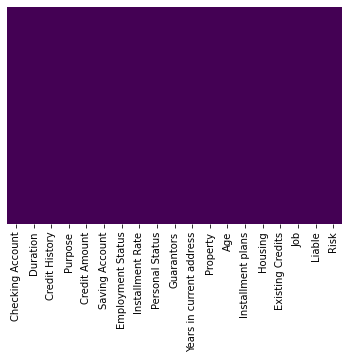

In [122]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

### Removing outliers

<AxesSubplot:xlabel='Duration'>

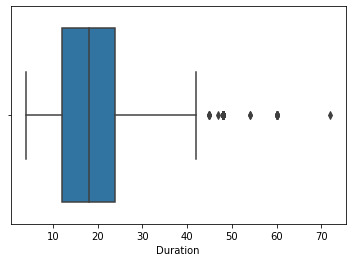

In [123]:
sns.boxplot(x = df['Duration'])

<AxesSubplot:xlabel='Risk', ylabel='Duration'>

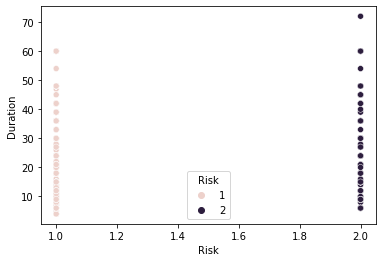

In [124]:
sns.scatterplot(data=df, x="Risk", y="Duration", hue = "Risk")

<AxesSubplot:xlabel='Credit Amount'>

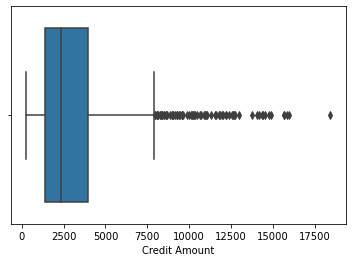

In [125]:
sns.boxplot(x = df['Credit Amount'])


<AxesSubplot:xlabel='Risk', ylabel='Credit Amount'>

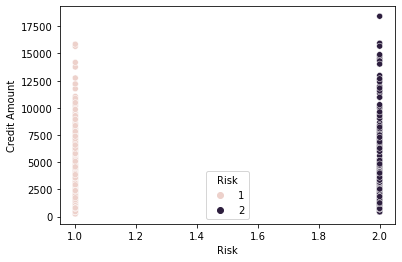

In [126]:
sns.scatterplot(data=df, x="Risk", y="Credit Amount", hue = "Risk")

<AxesSubplot:xlabel='Age'>

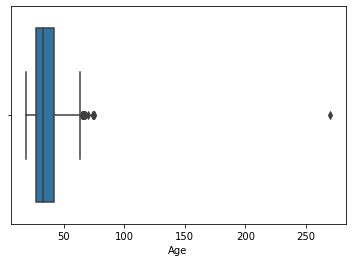

In [127]:
sns.boxplot(x = df['Age'])

<AxesSubplot:xlabel='Risk', ylabel='Age'>

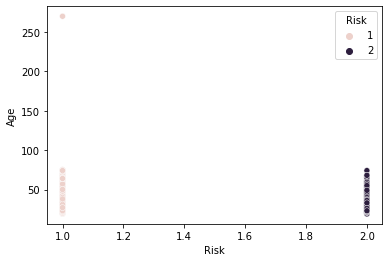

In [128]:
sns.scatterplot(data=df, x="Risk", y="Age", hue = "Risk")

In [129]:
df = df[df['Duration'] <65]
df = df[df['Credit Amount'] <17500]
df = df[df['Age'] <100]

In [130]:
df.shape

(998, 19)

In [131]:
df.head()

,Checking Account,Duration,Credit History,Purpose,Credit Amount,Saving Account,Employment Status,Installment Rate,Personal Status,Guarantors,Years in current address,Property,Age,Installment plans,Housing,Existing Credits,Job,Liable,Risk
0,little,6,default,radio/television,1169,unknown,>= 7 years,4,male : single,none,4,real estate,67,none,own,2,skilled employee,1,1
1,moderate,48,paid back,radio/television,5951,little,1 to <4 years,2,female : divorced/separated/married,none,2,real estate,22,none,own,1,skilled employee,1,2
2,No Account,12,default,education,2096,little,4 to <7 years,2,male : single,none,3,real estate,49,none,own,1,unskilled/resident,2,1
3,little,42,paid back,furniture/equipment,7882,little,4 to <7 years,2,male : single,guarantor,4,life insurance,45,none,for free,1,skilled employee,2,1
4,little,24,delay,car,4870,little,1 to <4 years,3,male : single,none,4,no property,53,none,for free,2,skilled employee,2,2


### Performed basic exploration of relationship, with plots and graphs

In [132]:
df.corr()

,Duration,Credit Amount,Installment Rate,Years in current address,Age,Existing Credits,Liable,Risk
Duration,1.000000,0.625851,0.083552,0.039528,-0.031505,-0.006783,-0.021301,0.207890
Credit Amount,0.625851,1.000000,-0.265568,0.034210,0.035789,0.025563,0.020103,0.147799
Installment Rate,0.083552,-0.265568,1.000000,0.047400,0.056971,0.019856,-0.072492,0.076765
Years in current address,0.039528,0.034210,0.047400,1.000000,0.265707,0.088639,0.042018,0.005328
Age,-0.031505,0.035789,0.056971,0.265707,1.000000,0.148474,0.117719,-0.089355
Existing Credits,-0.006783,0.025563,0.019856,0.088639,0.148474,1.000000,0.109136,-0.043699
Liable,-0.021301,0.020103,-0.072492,0.042018,0.117719,0.109136,1.000000,-0.001708
Risk,0.207890,0.147799,0.076765,0.005328,-0.089355,-0.043699,-0.001708,1.000000


In [133]:
df.corr().filter(items=['Risk']).sort_values('Risk', ascending=False, key = abs)


,Risk
Risk,1.000000
Duration,0.207890
Credit Amount,0.147799
Age,-0.089355
Installment Rate,0.076765
Existing Credits,-0.043699
Years in current address,0.005328
Liable,-0.001708


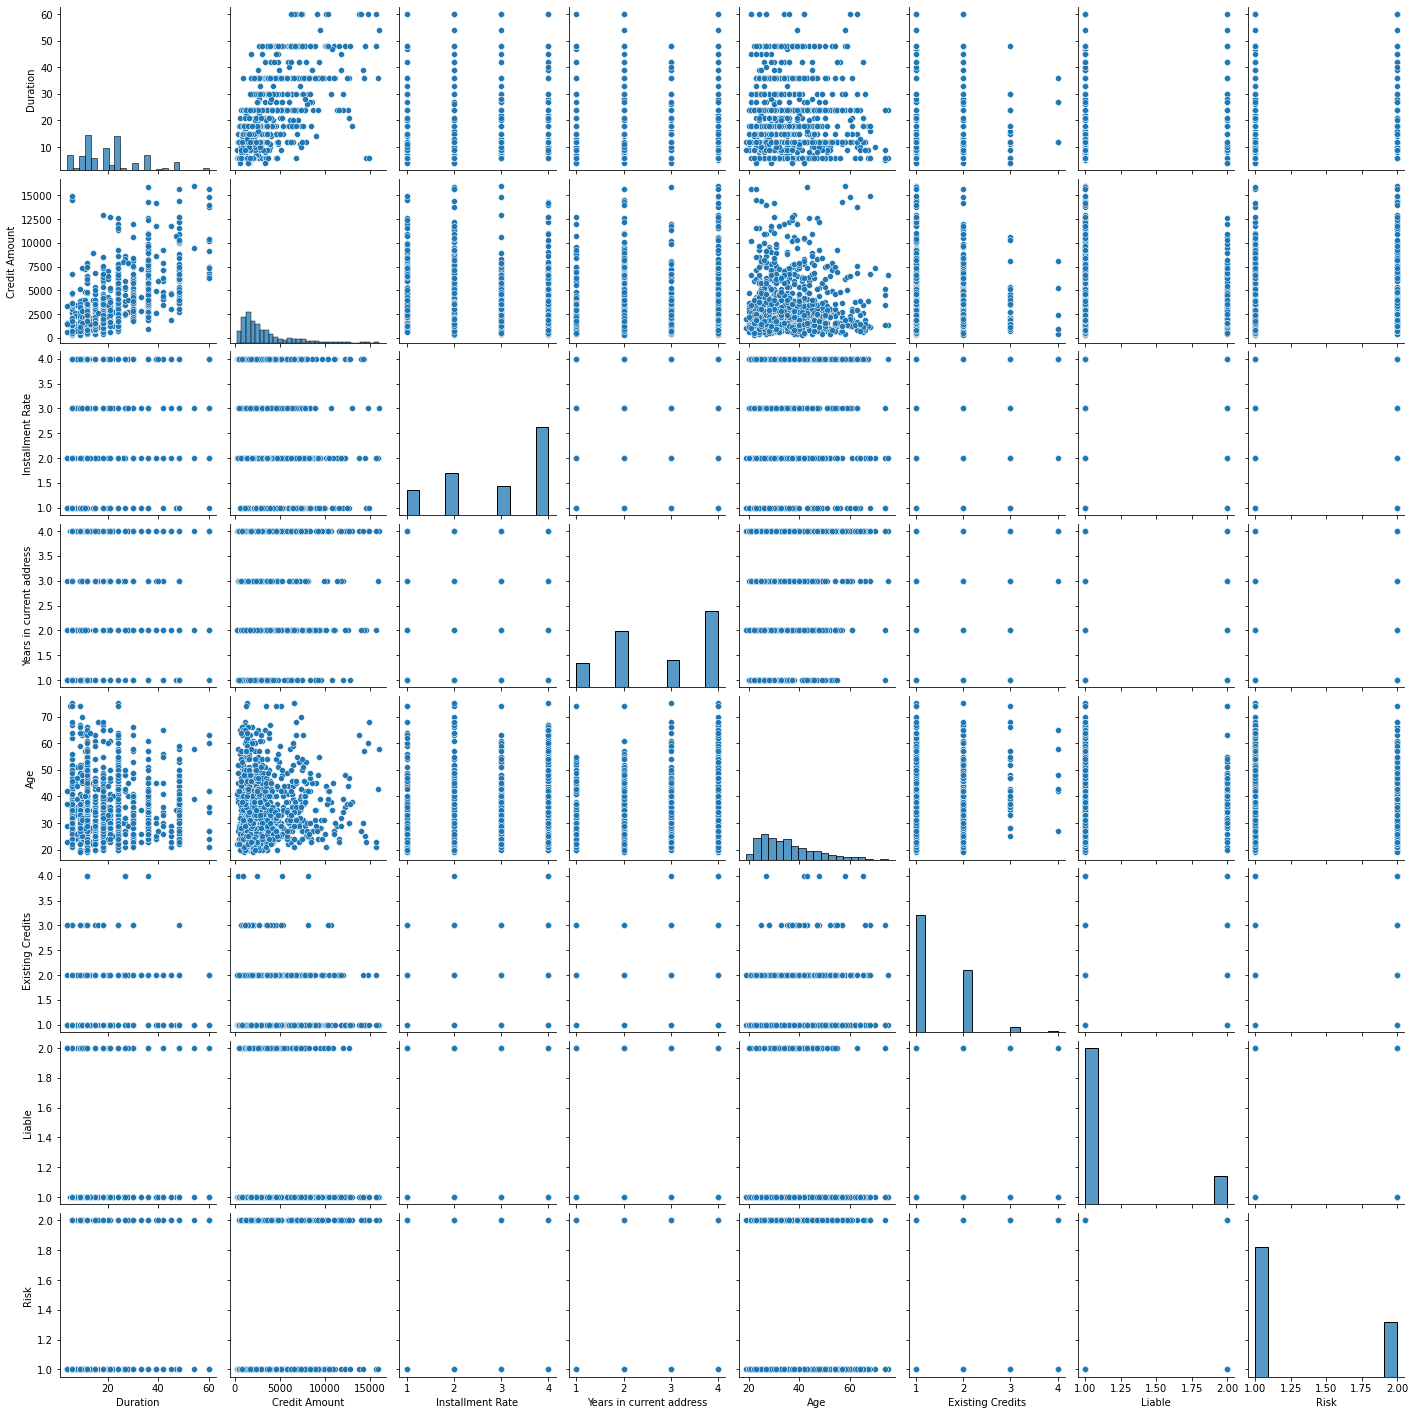

In [134]:
sns.pairplot(df)

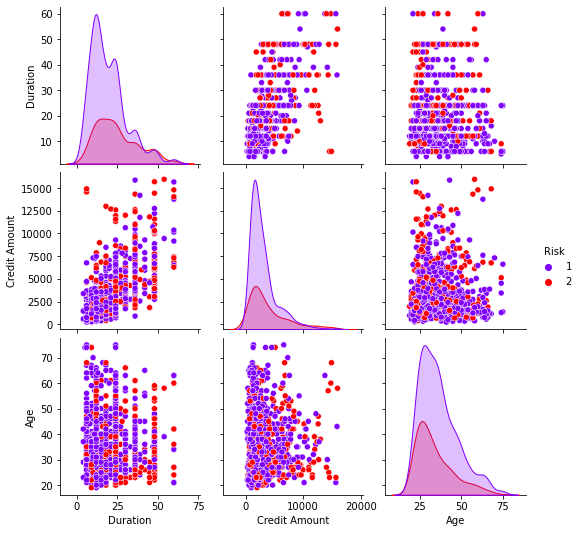

In [135]:
df_temp = df[['Duration','Credit Amount','Age', 'Risk']]
sns.pairplot(df_temp, hue='Risk', palette='rainbow')

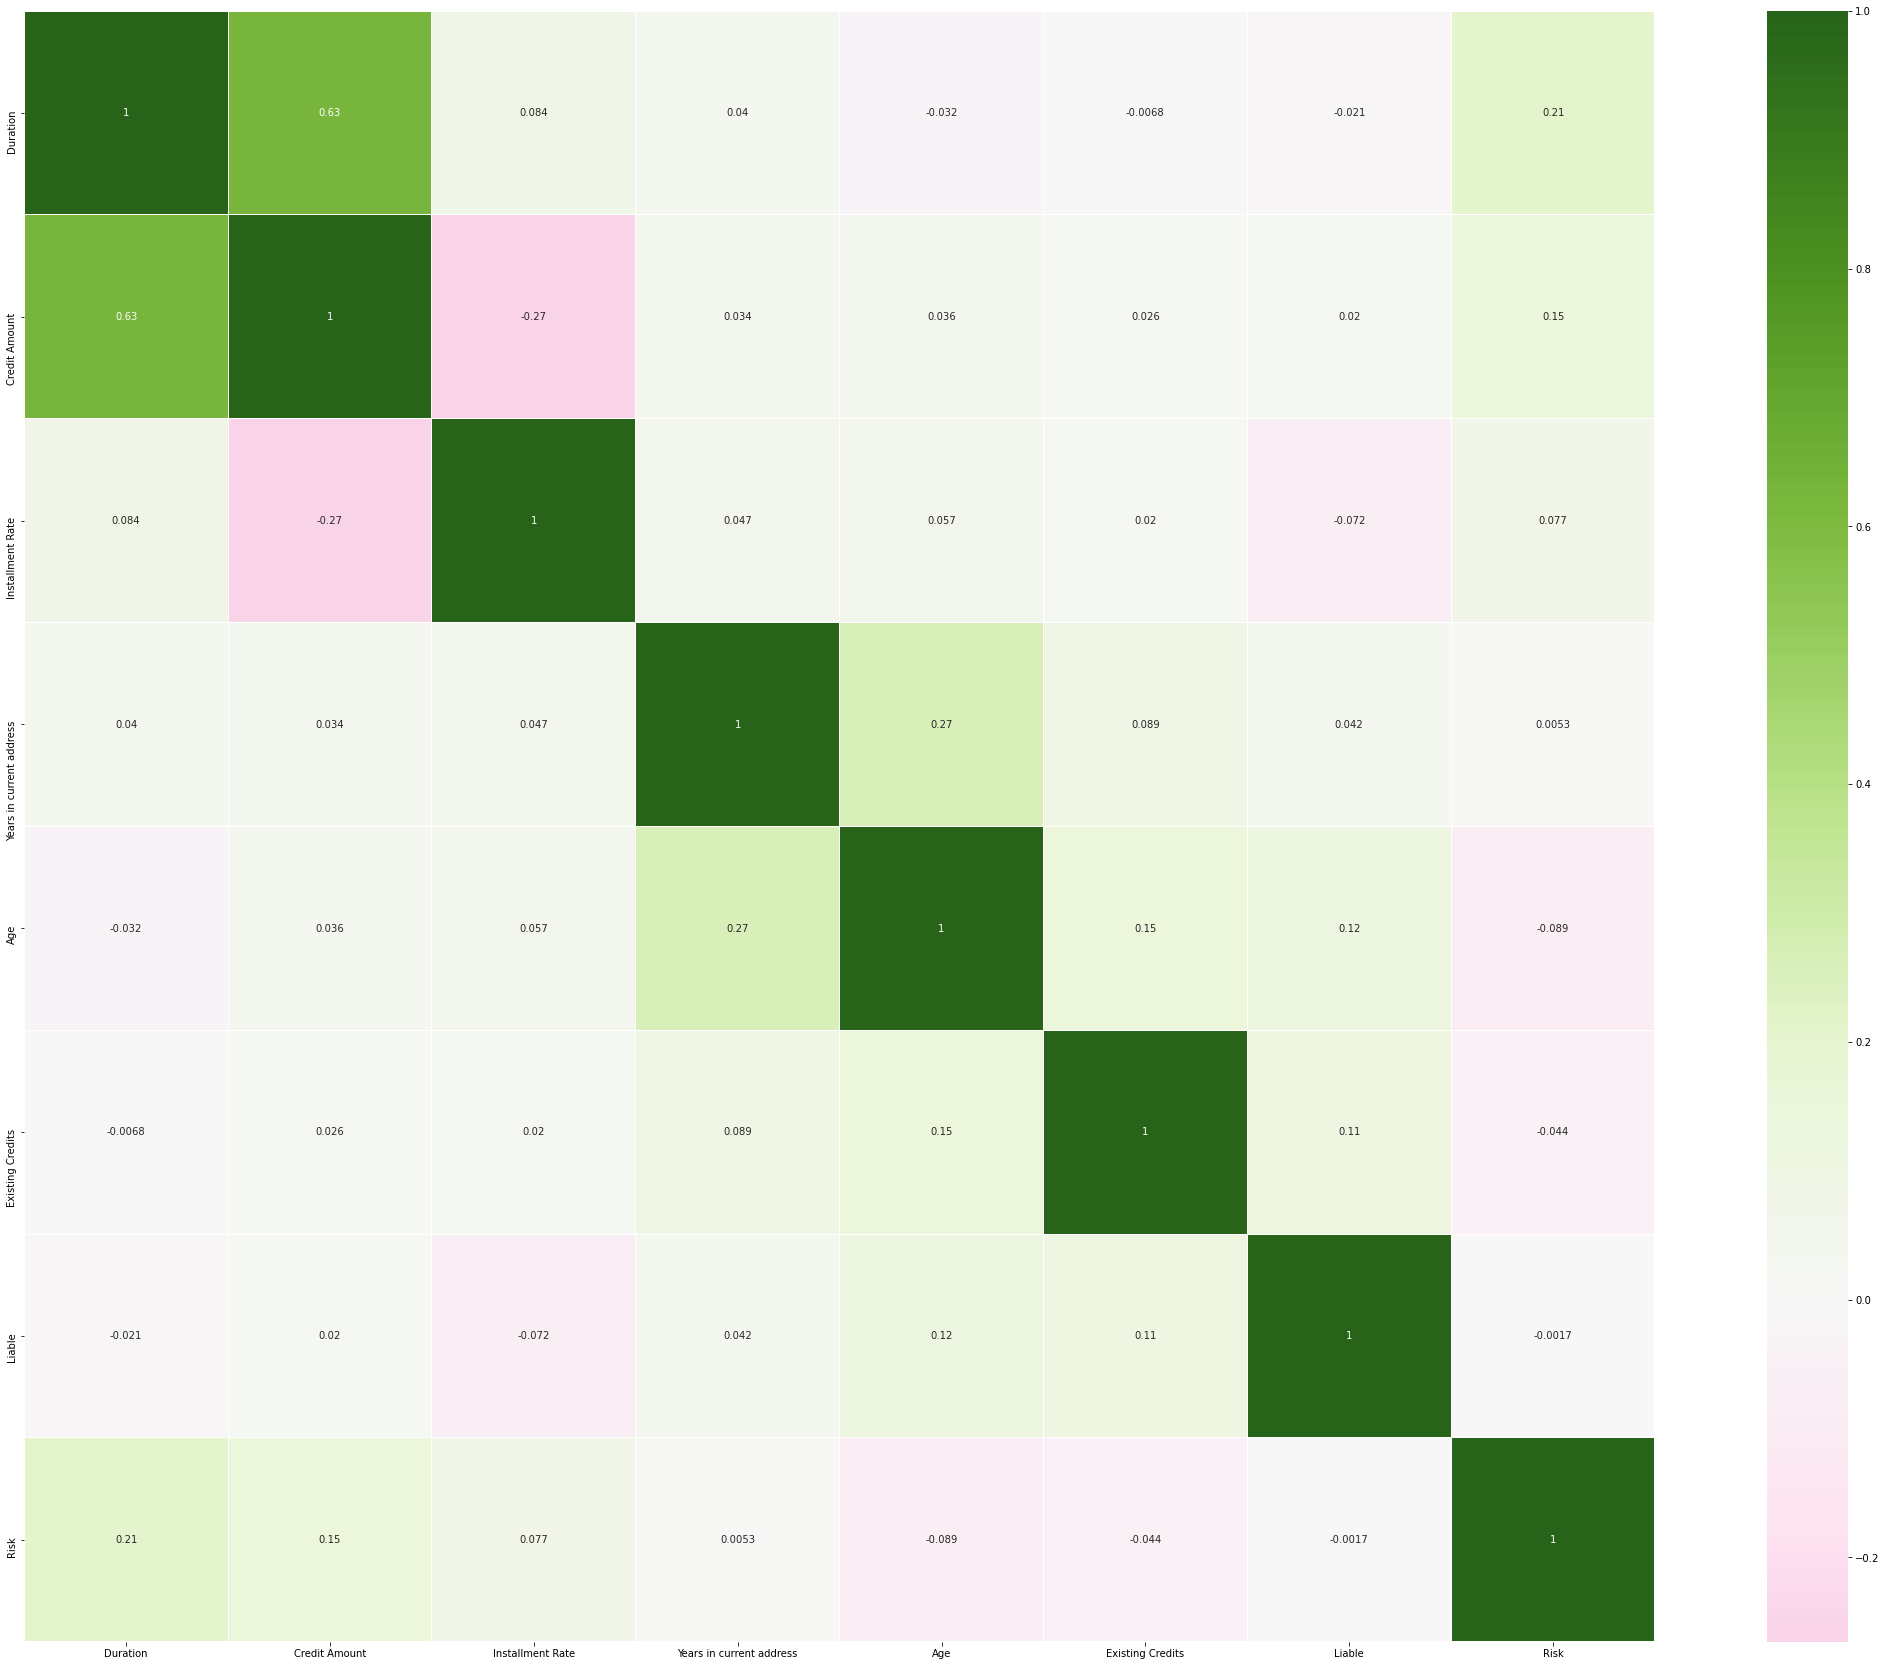

In [136]:
fig,ax = plt.subplots(1,1,figsize=(40,30))
sns.heatmap(df.corr(), square=True, linewidth=0.1, cmap="PiYG", ax=ax, annot=True, center=0)
plt.show()

In [137]:
df.head()

,Checking Account,Duration,Credit History,Purpose,Credit Amount,Saving Account,Employment Status,Installment Rate,Personal Status,Guarantors,Years in current address,Property,Age,Installment plans,Housing,Existing Credits,Job,Liable,Risk
0,little,6,default,radio/television,1169,unknown,>= 7 years,4,male : single,none,4,real estate,67,none,own,2,skilled employee,1,1
1,moderate,48,paid back,radio/television,5951,little,1 to <4 years,2,female : divorced/separated/married,none,2,real estate,22,none,own,1,skilled employee,1,2
2,No Account,12,default,education,2096,little,4 to <7 years,2,male : single,none,3,real estate,49,none,own,1,unskilled/resident,2,1
3,little,42,paid back,furniture/equipment,7882,little,4 to <7 years,2,male : single,guarantor,4,life insurance,45,none,for free,1,skilled employee,2,1
4,little,24,delay,car,4870,little,1 to <4 years,3,male : single,none,4,no property,53,none,for free,2,skilled employee,2,2


### Dummy Variables

In [138]:
checkAcc =pd.get_dummies(df['Checking Account'])
credHist =pd.get_dummies(df['Credit History'])
purpose =pd.get_dummies(df['Purpose'])
savAcc =pd.get_dummies(df['Saving Account'])
Employment =pd.get_dummies(df['Employment Status'])
Personal =pd.get_dummies(df['Personal Status'])
guarantors =pd.get_dummies(df['Guarantors'])
prop =pd.get_dummies(df['Property'])
installPlan =pd.get_dummies(df['Installment plans'])
housing =pd.get_dummies(df['Housing'])
job =pd.get_dummies(df['Job'])

In [139]:
checkAcc.columns = ['Check-noAcc','Check-little','Check-mod','Check-rich']
credHist.columns = ['credit-def','credit-delay','credit-paid']
savAcc.columns = ['Save-little','Save-mod','Save-qr','Save-rich', 'Save-uk']
guarantors.columns = ['co-applicant','guarantor','guarantor-none']
installPlan.columns = ['Plan-bank','Plan-none','Plan-stores']


In [140]:
numerical_values = ['Duration', 'Credit Amount', 'Installment Rate', 'Years in current address','Age', 'Existing Credits', 'Liable', 'Risk' ]
numerical_df = df[numerical_values]
df = pd.concat([numerical_df, checkAcc, credHist, purpose, savAcc, Employment, Personal, guarantors, prop, installPlan, housing, job], axis=1)
df.head()

,Duration,Credit Amount,Installment Rate,Years in current address,Age,Existing Credits,Liable,Risk,Check-noAcc,Check-little,...,Plan-bank,Plan-none,Plan-stores,for free,own,rent,management/highly qualified employee,skilled employee,unemployed/non-resident,unskilled/resident
0,6,1169,4,4,67,2,1,1,0,1,...,0,1,0,0,1,0,0,1,0,0
1,48,5951,2,2,22,1,1,2,0,0,...,0,1,0,0,1,0,0,1,0,0
2,12,2096,2,3,49,1,2,1,1,0,...,0,1,0,0,1,0,0,0,0,1
3,42,7882,2,4,45,1,2,1,0,1,...,0,1,0,1,0,0,0,1,0,0
4,24,4870,3,4,53,2,2,2,0,1,...,0,1,0,1,0,0,0,1,0,0


In [141]:
df.corr()

,Duration,Credit Amount,Installment Rate,Years in current address,Age,Existing Credits,Liable,Risk,Check-noAcc,Check-little,...,Plan-bank,Plan-none,Plan-stores,for free,own,rent,management/highly qualified employee,skilled employee,unemployed/non-resident,unskilled/resident
Duration,1.000000,0.625851,0.083552,0.039528,-0.031505,-0.006783,-0.021301,0.207890,-0.058947,0.026556,...,0.032423,-0.065829,0.067923,0.193649,-0.080257,-0.062116,0.145998,0.055404,-0.043575,-0.180087
Credit Amount,0.625851,1.000000,-0.265568,0.034210,0.035789,0.025563,0.020103,0.147799,-0.035024,-0.017364,...,0.026911,-0.038094,0.026029,0.206908,-0.123321,-0.022046,0.312732,-0.087660,-0.027447,-0.161092
Installment Rate,0.083552,-0.265568,1.000000,0.047400,0.056971,0.019856,-0.072492,0.076765,0.022892,0.045401,...,-0.012164,-0.019502,0.055596,0.039260,0.051718,-0.092807,0.046911,0.041113,-0.088403,-0.058686
Years in current address,0.039528,0.034210,0.047400,1.000000,0.265707,0.088639,0.042018,0.005328,0.000748,0.087491,...,0.016192,0.015510,-0.054836,0.226670,-0.296868,0.166703,0.006497,-0.001072,-0.034797,0.008304
Age,-0.031505,0.035789,0.056971,0.265707,1.000000,0.148474,0.117719,-0.089355,0.061439,-0.011991,...,0.047100,-0.035634,-0.011383,0.252769,0.007404,-0.213409,0.128386,-0.148166,0.059789,0.043082
Existing Credits,-0.006783,0.025563,0.019856,0.088639,0.148474,1.000000,0.109136,-0.043699,0.093403,-0.030089,...,0.043826,-0.051575,0.023195,0.010921,0.042320,-0.058772,-0.009539,-0.001854,0.059401,-0.011107
Liable,-0.021301,0.020103,-0.072492,0.042018,0.117719,0.109136,1.000000,-0.001708,0.010230,0.058547,...,0.076673,-0.073095,0.009147,0.117784,-0.027050,-0.063459,-0.014290,-0.107110,-0.007854,0.144700
Risk,0.207890,0.147799,0.076765,0.005328,-0.089355,-0.043699,-0.001708,1.000000,-0.320927,0.260923,...,0.093834,-0.111332,0.051326,0.082825,-0.136906,0.094456,0.037724,-0.012780,0.006425,-0.020344
Check-noAcc,-0.058947,-0.035024,0.022892,0.000748,0.061439,0.093403,0.010230,-0.320927,1.000000,-0.496862,...,-0.050364,0.047666,-0.005372,-0.070192,0.105543,-0.067683,-0.017550,0.075066,-0.079376,-0.045873
Check-little,0.026556,-0.017364,0.045401,0.087491,-0.011991,-0.030089,0.058547,0.260923,-0.496862,1.000000,...,0.013738,-0.018537,0.011618,0.067566,-0.125022,0.092790,-0.021278,-0.003216,-0.000613,0.022941


### Separated data set into training and testing

## SVM Model

In [142]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split

### Include all variables 

In [143]:
df.head()

,Duration,Credit Amount,Installment Rate,Years in current address,Age,Existing Credits,Liable,Risk,Check-noAcc,Check-little,...,Plan-bank,Plan-none,Plan-stores,for free,own,rent,management/highly qualified employee,skilled employee,unemployed/non-resident,unskilled/resident
0,6,1169,4,4,67,2,1,1,0,1,...,0,1,0,0,1,0,0,1,0,0
1,48,5951,2,2,22,1,1,2,0,0,...,0,1,0,0,1,0,0,1,0,0
2,12,2096,2,3,49,1,2,1,1,0,...,0,1,0,0,1,0,0,0,0,1
3,42,7882,2,4,45,1,2,1,0,1,...,0,1,0,1,0,0,0,1,0,0
4,24,4870,3,4,53,2,2,2,0,1,...,0,1,0,1,0,0,0,1,0,0


In [144]:
X = df.drop('Risk', axis=1).values
Y = df['Risk'].values
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=0)

svc_model = SVC(kernel='linear')
svc_model.fit(X_train, Y_train)
Y_pred = svc_model.predict(X_test)
print("Kernel = Linear, C = DEFAULT = 1.0")
print("Accuracy: ", accuracy_score(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))

Kernel = Linear, C = DEFAULT = 1.0
Accuracy:  0.765
              precision    recall  f1-score   support

           1       0.82      0.89      0.85       151
           2       0.53      0.39      0.45        49

    accuracy                           0.77       200
   macro avg       0.67      0.64      0.65       200
weighted avg       0.75      0.77      0.75       200



<AxesSubplot:xlabel='trail'>

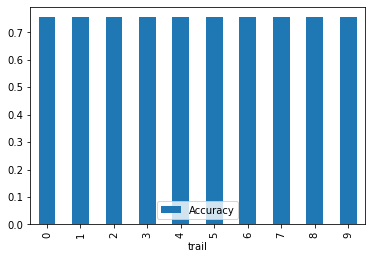

In [145]:
accuracy = []
for i in range(10):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=0)
    model = svm.SVC()
    model.fit(X_train, Y_train)
    Y_pred =model.predict(X_test)
    accuracy.append(accuracy_score(Y_test, Y_pred))
 
rdf = pd.DataFrame({'trail': range(10), 'Accuracy': accuracy})
rdf.plot.bar(x='trail', y='Accuracy')

### SVM Model without the Credit History variables

In [146]:
df2 = df.drop('credit-def', axis =1)
df3 = df2.drop('credit-delay', axis =1)
df4 = df3.drop('credit-paid', axis =1)


In [147]:
X4 = df4.drop('Risk', axis=1).values
Y4 = df4['Risk'].values
X4_train, X4_test, Y4_train, Y4_test = train_test_split(X4, Y4, test_size = 0.2, random_state=0)

svc_model = SVC(kernel='linear')
svc_model.fit(X4_train, Y4_train)
Y4_pred = svc_model.predict(X4_test)
print("Kernel = Linear, C = DEFAULT = 1.0")
print("Accuracy: ", accuracy_score(Y4_test, Y4_pred))
print(classification_report(Y4_test, Y4_pred))

Kernel = Linear, C = DEFAULT = 1.0
Accuracy:  0.73
              precision    recall  f1-score   support

           1       0.80      0.85      0.83       151
           2       0.44      0.35      0.39        49

    accuracy                           0.73       200
   macro avg       0.62      0.60      0.61       200
weighted avg       0.71      0.73      0.72       200



<AxesSubplot:xlabel='trail'>

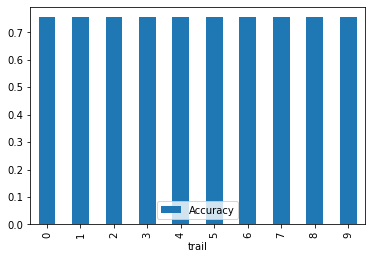

In [148]:
accuracy = []
for i in range(10):
    X4_train, X4_test, Y4_train, Y4_test = train_test_split(X4, Y4, test_size = 0.2, random_state=0)
    model = svm.SVC()
    model.fit(X4_train, Y4_train)
    Y4_pred =model.predict(X4_test)
    accuracy.append(accuracy_score(Y4_test, Y4_pred))
 
rdf = pd.DataFrame({'trail': range(10), 'Accuracy': accuracy})
rdf.plot.bar(x='trail', y='Accuracy')

#### I used all the variables, including the dummy varibles for this model. For the second one, I excluded the credit history variable to see if it as a impact. I perfomed cross validation and both of these are reliable. The accuracy with Credit History was 0.765 and without was 0.73. 

### SVM with selected variables. I'm going to be focusing on credit amount, duration and age

In [149]:
df5 = df[['Duration', 'Credit Amount', 'Age', 'credit-def', 'credit-delay', 'credit-paid', 'Risk']]
X = df5.drop('Risk', axis=1).values
Y = df5['Risk'].values
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=0)

svc_model = SVC(kernel='linear')
svc_model.fit(X_train, Y_train)
Y_pred = svc_model.predict(X_test)
print("Kernel = Linear, C = DEFAULT = 1.0")
print("Accuracy: ", accuracy_score(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))

Kernel = Linear, C = DEFAULT = 1.0
Accuracy:  0.715
              precision    recall  f1-score   support

           1       0.78      0.87      0.82       151
           2       0.37      0.22      0.28        49

    accuracy                           0.71       200
   macro avg       0.57      0.55      0.55       200
weighted avg       0.68      0.71      0.69       200



<AxesSubplot:xlabel='trail'>

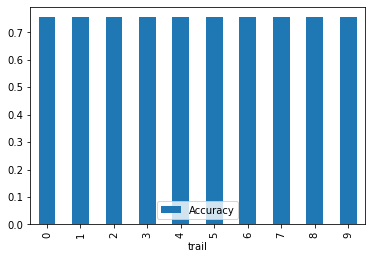

In [150]:
accuracy = []
for i in range(10):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=0)
    model = svm.SVC()
    model.fit(X_train, Y_train)
    Y_pred =model.predict(X_test)
    accuracy.append(accuracy_score(Y_test, Y_pred))
 
rdf = pd.DataFrame({'trail': range(10), 'Accuracy': accuracy})
rdf.plot.bar(x='trail', y='Accuracy')

### SVM with selected variables. Im going to be focusing on credit amount, duration and age but I'm going to remove credit history

In [151]:
df6 = df[['Duration', 'Credit Amount', 'Age','Risk']]
X = df6.drop('Risk', axis=1).values
Y = df6['Risk'].values
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=0)

svc_model = SVC(kernel='linear')
svc_model.fit(X_train, Y_train)
Y_pred = svc_model.predict(X_test)
print("Kernel = Linear, C = DEFAULT = 1.0")
print("Accuracy: ", accuracy_score(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))

Kernel = Linear, C = DEFAULT = 1.0
Accuracy:  0.755
              precision    recall  f1-score   support

           1       0.76      0.99      0.86       151
           2       0.50      0.04      0.08        49

    accuracy                           0.76       200
   macro avg       0.63      0.51      0.47       200
weighted avg       0.70      0.76      0.67       200



<AxesSubplot:xlabel='trail'>

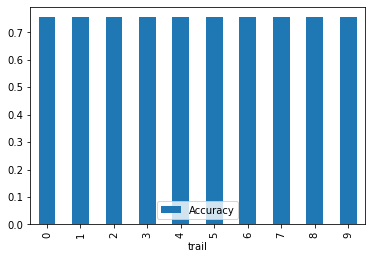

In [152]:
accuracy = []
for i in range(10):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=0)
    model = svm.SVC()
    model.fit(X_train, Y_train)
    Y_pred =model.predict(X_test)
    accuracy.append(accuracy_score(Y_test, Y_pred))
 
rdf = pd.DataFrame({'trail': range(10), 'Accuracy': accuracy})
rdf.plot.bar(x='trail', y='Accuracy')

#### I used a few selected variables which I thoight correlated with risk. For the second one, I excluded the credit history variable to see if it as a impact. I perfomed cross validation and both of these are reliable. The accuracy with Credit History was 0.715 and without was 0.75. 

## Decision Tree Model

In [153]:
criterias=['gini','entropy']
for d in range(2,6):
    for c in criterias:
        # Split into training and testing sets
        X = df.drop('Risk', axis=1).values
        Y = df['Risk'].values
        X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=0)
        # Build the model
        model = DecisionTreeClassifier(max_depth=d, criterion=c)
        model.fit(X_train,Y_train)
        predictions = model.predict(X_test)
        
        # Check their model performance
        print('---------------------------------')
        print('depth: '+str(d) + '\t' + 'criterion: ' + c +'\n')
        print(confusion_matrix(Y_test,predictions))
        print(classification_report(Y_test,predictions))
        print(accuracy_score(Y_test, predictions))

---------------------------------
depth: 2	criterion: gini

[[121  30]
 [ 31  18]]
              precision    recall  f1-score   support

           1       0.80      0.80      0.80       151
           2       0.38      0.37      0.37        49

    accuracy                           0.69       200
   macro avg       0.59      0.58      0.58       200
weighted avg       0.69      0.69      0.69       200

0.695
---------------------------------
depth: 2	criterion: entropy

[[121  30]
 [ 31  18]]
              precision    recall  f1-score   support

           1       0.80      0.80      0.80       151
           2       0.38      0.37      0.37        49

    accuracy                           0.69       200
   macro avg       0.59      0.58      0.58       200
weighted avg       0.69      0.69      0.69       200

0.695
---------------------------------
depth: 3	criterion: gini

[[134  17]
 [ 36  13]]
              precision    recall  f1-score   support

           1       0.79    

<AxesSubplot:xlabel='trail'>

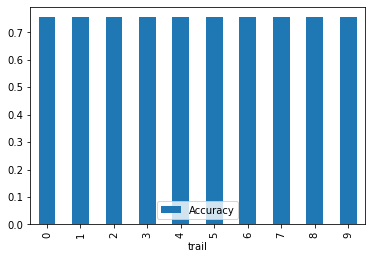

In [154]:
accuracy = []
for i in range(10):
    X = df.drop('Risk', axis=1).values
    Y = df['Risk'].values
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=0)
    # Build the model
    model = DecisionTreeClassifier(max_depth=3, criterion='gini')
    accuracy.append(accuracy_score(Y_test, Y_pred))
 
rdf = pd.DataFrame({'trail': range(10), 'Accuracy': accuracy})
rdf.plot.bar(x='trail', y='Accuracy')

### Excluding Credit History

In [155]:
criterias=['gini','entropy']
for d in range(2,6):
    for c in criterias:
        # Split into training and testing sets
        X = df4.drop('Risk', axis=1).values
        Y = df4['Risk'].values
        X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=0)
        # Build the model
        model = DecisionTreeClassifier(max_depth=d, criterion=c)
        model.fit(X_train,Y_train)
        predictions = model.predict(X_test)
        
        # Check their model performance
        print('---------------------------------')
        print('depth: '+str(d) + '\t' + 'criterion: ' + c +'\n')
        print(confusion_matrix(Y_test,predictions))
        print(classification_report(Y_test,predictions))
        print(accuracy_score(Y_test, predictions))

---------------------------------
depth: 2	criterion: gini

[[121  30]
 [ 31  18]]
              precision    recall  f1-score   support

           1       0.80      0.80      0.80       151
           2       0.38      0.37      0.37        49

    accuracy                           0.69       200
   macro avg       0.59      0.58      0.58       200
weighted avg       0.69      0.69      0.69       200

0.695
---------------------------------
depth: 2	criterion: entropy

[[121  30]
 [ 31  18]]
              precision    recall  f1-score   support

           1       0.80      0.80      0.80       151
           2       0.38      0.37      0.37        49

    accuracy                           0.69       200
   macro avg       0.59      0.58      0.58       200
weighted avg       0.69      0.69      0.69       200

0.695
---------------------------------
depth: 3	criterion: gini

[[134  17]
 [ 36  13]]
              precision    recall  f1-score   support

           1       0.79    

<AxesSubplot:xlabel='trail'>

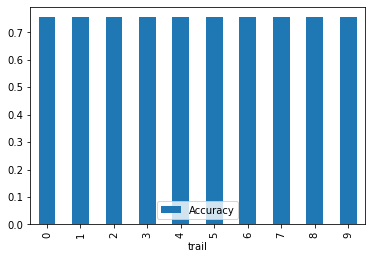

In [156]:
accuracy = []
for i in range(10):
    X = df.drop('Risk', axis=1).values
    Y = df['Risk'].values
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=0)
    # Build the model
    model = DecisionTreeClassifier(max_depth=3, criterion='gini')
    accuracy.append(accuracy_score(Y_test, Y_pred))
 
rdf = pd.DataFrame({'trail': range(10), 'Accuracy': accuracy})
rdf.plot.bar(x='trail', y='Accuracy')

#### I used all the variables, including the dummy varibles for this model. For the second one, I excluded the credit history variable to see if it as a impact. For this model, I will use depth 3, criterion gini because it has the highest f1-score as well as the highest accuracy compared to the other models. The accuracy with Credit History was 0.735 and without was 0.735, which is the same.

### Duration, Credit Amount, Age, Credit History

In [157]:
criterias=['gini','entropy']
for d in range(2,6):
    for c in criterias:
        # Split into training and testing sets
        X = df5.drop('Risk', axis=1).values
        Y = df5['Risk'].values
        X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=0)


        # Build the model
        model = DecisionTreeClassifier(max_depth=d, criterion=c)
        model.fit(X_train,Y_train)
        predictions = model.predict(X_test)
        
        # Check their model performance
        print('---------------------------------')
        print('depth: '+str(d) + '\t' + 'criterion: ' + c +'\n')
        print(confusion_matrix(Y_test,predictions))
        print(classification_report(Y_test,predictions))
        print(accuracy_score(Y_test, predictions))

---------------------------------
depth: 2	criterion: gini

[[151   0]
 [ 49   0]]
              precision    recall  f1-score   support

           1       0.76      1.00      0.86       151
           2       0.00      0.00      0.00        49

    accuracy                           0.76       200
   macro avg       0.38      0.50      0.43       200
weighted avg       0.57      0.76      0.65       200

0.755
---------------------------------
depth: 2	criterion: entropy

[[151   0]
 [ 49   0]]
              precision    recall  f1-score   support

           1       0.76      1.00      0.86       151
           2       0.00      0.00      0.00        49

    accuracy                           0.76       200
   macro avg       0.38      0.50      0.43       200
weighted avg       0.57      0.76      0.65       200

0.755
---------------------------------
depth: 3	criterion: gini

[[148   3]
 [ 47   2]]
              precision    recall  f1-score   support

           1       0.76    

<AxesSubplot:xlabel='trail'>

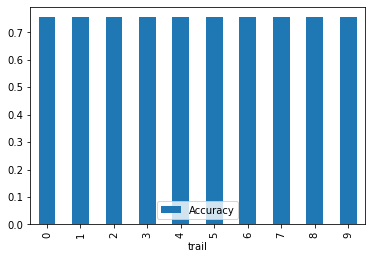

In [158]:
accuracy = []
for i in range(10):
    X = df.drop('Risk', axis=1).values
    Y = df['Risk'].values
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=0)
    # Build the model
    model = DecisionTreeClassifier(max_depth=2, criterion='gini')
    accuracy.append(accuracy_score(Y_test, Y_pred))
 
rdf = pd.DataFrame({'trail': range(10), 'Accuracy': accuracy})
rdf.plot.bar(x='trail', y='Accuracy')

### Duration, Credit Amount, Age. NO Credit History

In [159]:
criterias=['gini','entropy']
for d in range(2,6):
    for c in criterias:
        # Split into training and testing sets
        X = df6.drop('Risk', axis=1).values
        Y = df6['Risk'].values
        X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=0)


        # Build the model
        model = DecisionTreeClassifier(max_depth=d, criterion=c)
        model.fit(X_train,Y_train)
        predictions = model.predict(X_test)
        
        # Check their model performance
        print('---------------------------------')
        print('depth: '+str(d) + '\t' + 'criterion: ' + c +'\n')
        print(confusion_matrix(Y_test,predictions))
        print(classification_report(Y_test,predictions))
        print(accuracy_score(Y_test, predictions))

---------------------------------
depth: 2	criterion: gini

[[149   2]
 [ 48   1]]
              precision    recall  f1-score   support

           1       0.76      0.99      0.86       151
           2       0.33      0.02      0.04        49

    accuracy                           0.75       200
   macro avg       0.54      0.50      0.45       200
weighted avg       0.65      0.75      0.66       200

0.75
---------------------------------
depth: 2	criterion: entropy

[[149   2]
 [ 48   1]]
              precision    recall  f1-score   support

           1       0.76      0.99      0.86       151
           2       0.33      0.02      0.04        49

    accuracy                           0.75       200
   macro avg       0.54      0.50      0.45       200
weighted avg       0.65      0.75      0.66       200

0.75
---------------------------------
depth: 3	criterion: gini

[[136  15]
 [ 40   9]]
              precision    recall  f1-score   support

           1       0.77      

<AxesSubplot:xlabel='trail'>

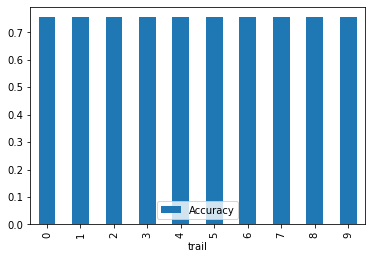

In [160]:
accuracy = []
for i in range(10):
    X = df.drop('Risk', axis=1).values
    Y = df['Risk'].values
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=0)
    # Build the model
    model = DecisionTreeClassifier(max_depth=2, criterion='gini')
    accuracy.append(accuracy_score(Y_test, Y_pred))
 
rdf = pd.DataFrame({'trail': range(10), 'Accuracy': accuracy})
rdf.plot.bar(x='trail', y='Accuracy')

#### I used a few selected variables. For the second one, I excluded the credit history variable to see if it as a impact. For this model, I will use depth 2, criterion gini. The accuracy with Credit History was 0.755 and without was 0.75.

### Based on the numerical variables duration and credit amount seem to have the most correlation with the risk. 

### To answer the question about whether past credit history is an important factor or not, we can look at these SVM and decision tree models. I did the cross validations for all models, and all of them are reliable. Whether I used all variables or just a few selected ones, including credit history did not significantly increase or decrease the accuracy. In fact, most of the time, the accuracy changed very little or not at all. Therefore, we can conclude that the a person's past credit history was not an important factor. 

### The accuracy for all the models tested is over 0.70, which is a good accuracy rate for predicting whether the risk is good or bad. 

### 